In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(0)

# Load the store sales dataset
excel_file = pd.ExcelFile('data/store_sales.xlsx')
sheet_names = excel_file.sheet_names

# Read the data
results_df = pd.read_excel(excel_file, sheet_name=sheet_names[2])  # 2, 8, 9
iri_key_counts = results_df['IRI_KEY'].value_counts()
iri_keys = iri_key_counts[iri_key_counts > 300].index


features = ['F', 'D', 'Unit.Price']
target = 'Total.Volume'

results_df = results_df[results_df['IRI_KEY'] == iri_keys[0]]
X = results_df[features].values
y = results_df[target].values

sheet_names, iri_keys, X.shape, y.shape

(['StoreWeekSalescarbbev_modify',
  'StoreWeekSalescigets',
  'StoreWeekSalescoffee',
  'StoreWeekSalescoldcer',
  'StoreWeekSalesdeod',
  'StoreWeekSalesdiapers',
  'StoreWeekSalesfactiss',
  'StoreWeekSalesfzdinent',
  'StoreWeekSalesfzpizza',
  'StoreWeekSaleshotdog',
  'StoreWeekSaleslaundet',
  'StoreWeekSalesmargbutr',
  'StoreWeekSalesmayo',
  'StoreWeekSalesmustketc',
  'StoreWeekSalespaptowl',
  'StoreWeekSalespeanbutr',
  'StoreWeekSalesshamp',
  'StoreWeekSalessoup',
  'StoreWeekSalesspagsauc',
  'StoreWeekSalessugarsub',
  'StoreWeekSalestoitisu',
  'StoreWeekSalestoothpa',
  'StoreWeekSalesyogurt',
  'StoreWeekSalesbeer_modify'],
 Index([6001821.0,  648368.0,  279300.0,  400003.0,  270862.0,  231720.0,
         252570.0,  659827.0,  241565.0,  237277.0,  291276.0,  273920.0,
         232633.0,  233246.0,  532639.0,  533864.0],
       dtype='float64', name='IRI_KEY'),
 (313, 3),
 (313,))

In [3]:
# # Load the Boston dataset
# data_url = 'http://lib.stat.cmu.edu/datasets/boston'
# raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22,  # type: ignore
#                      header=None)  # type: ignore
# X = np.hstack([raw_df.values[::2, :-1], raw_df.values[1::2, :2]])
# y = raw_df.values[1::2, 2].reshape(-1, 1).ravel()

In [4]:
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()  # type: ignore

In [5]:
from sklearn.model_selection import GridSearchCV
from models_sklearn import Ensemble, MLP, FONN1, FONN2, TREENN1, TREENN2
from models import MLP as MLP_2, FONN1 as FONN1_2, FONN2 as FONN2_2, TREENN1 as TREENN1_2, TREENN2 as TREENN2_2


grid_search_params = {
    'n_jobs': -1,
    'verbose': 1
}

ensemble_param_grid = {
}

mlp_param_grid = {
    # 'max_iter': [1000, 100, 2000],
    'max_iter': [1000],
    'learning_rate': ['constant'],
    # 'learning_rate_init': [1e-1, 1e-2, 1e-3],
    'learning_rate_init': [1e1, 1e0, 1e-1, 1e-2],
    # 'tol': [1e-4],
    'early_stopping': [False, True]
}

models = {}
# models['Tree'] = GridSearchCV(Ensemble(1), ensemble_param_grid, **grid_search_params)
# models['Ensemble 5'] = GridSearchCV(Ensemble(5), ensemble_param_grid, **grid_search_params)
# models['MLP 5'] = GridSearchCV(MLP(5), mlp_param_grid, **grid_search_params)
# models['FONN1 5 5'] = GridSearchCV(FONN1(5, (10,)), mlp_param_grid, **grid_search_params)
# models['FONN2 5 5'] = GridSearchCV(FONN2(5, (10,)), mlp_param_grid, **grid_search_params)
# models['TREENN1 5'] = GridSearchCV(TREENN1((6,)), mlp_param_grid, **grid_search_params)
# models['TREENN2 5'] = GridSearchCV(TREENN2((6,)), mlp_param_grid, **grid_search_params)
models['Ensemble 10'] = GridSearchCV(
    Ensemble(10), ensemble_param_grid, **grid_search_params)
models['MLP 10'] = GridSearchCV(
    MLP(10), mlp_param_grid, **grid_search_params)
models['FONN1 5 10'] = GridSearchCV(
    FONN1(5, (10,)), mlp_param_grid, **grid_search_params)
models['FONN2 5 10'] = GridSearchCV(
    FONN2(5, (10,)), mlp_param_grid, **grid_search_params)
models['TREENN1 10'] = GridSearchCV(
    TREENN1((11,)), mlp_param_grid, **grid_search_params)
models['TREENN2 10'] = GridSearchCV(
    TREENN2((11,)), mlp_param_grid, **grid_search_params)

# models['Ensemble 40'] = GridSearchCV(
#     Ensemble(40), ensemble_param_grid, **grid_search_params)
# models['MLP 40'] = GridSearchCV(
#     MLP(40), mlp_param_grid, **grid_search_params)
# models['FONN1 5 40'] = GridSearchCV(
#     FONN1(5, (45,)), mlp_param_grid, **grid_search_params)
# models['FONN2 5 40'] = GridSearchCV(
#     FONN2(5, (45,)), mlp_param_grid, **grid_search_params)
# models['TREENN1 40'] = GridSearchCV(
#     TREENN1((41,)), mlp_param_grid, **grid_search_params)
# models['TREENN2 40'] = GridSearchCV(
#     TREENN2((41,)), mlp_param_grid, **grid_search_params)

# models['Ensemble 100'] = GridSearchCV(
#     Ensemble(100), ensemble_param_grid, **grid_search_params)
# models['MLP 100'] = GridSearchCV(
#     MLP(100), mlp_param_grid, **grid_search_params)
# models['FONN1 5 100'] = GridSearchCV(
#     FONN1(5, (105,)), mlp_param_grid, **grid_search_params)
# models['FONN2 5 100'] = GridSearchCV(
#     FONN2(5, (105,)), mlp_param_grid, **grid_search_params)
# models['TREENN1 100'] = GridSearchCV(
#     TREENN1((101,)), mlp_param_grid, **grid_search_params)
# models['TREENN2 100'] = GridSearchCV(
#     TREENN2((101,)), mlp_param_grid, **grid_search_params)

mlp_param_grid_2 = {
    'epochs': [4000, 1000],
    # 'learning_rate': [1e1, 1e0, 1e-1, 1e-2],
    'learning_rate': [1e-2, 1e-3], 
}

input_dim = X.shape[1]
hidden_dim = 10
output_dim = 1

models['MLP_2 10'] = GridSearchCV(
    MLP_2(input_dim, hidden_dim, output_dim), mlp_param_grid_2, **grid_search_params)

num_trees_input = 5
models['FONN1_2 5 10'] = GridSearchCV(
    FONN1_2(input_dim, hidden_dim, output_dim, num_trees_input), mlp_param_grid_2, **grid_search_params)

num_trees_hidden = 5
models['FONN2_2 5 10'] = GridSearchCV(
    FONN2_2(input_dim, hidden_dim, output_dim, num_trees_hidden), mlp_param_grid_2, **grid_search_params)

# models['TREENN1_2 10'] = GridSearchCV(
#     TREENN1_2(input_dim, hidden_dim, output_dim), mlp_param_grid_2, **grid_search_params)

# models['TREENN2_2 10'] = GridSearchCV(
#     TREENN2_2(input_dim, hidden_dim, output_dim), mlp_param_grid_2, **grid_search_params)
models['TREENN1_2 10'] = GridSearchCV(
    FONN1_2(input_dim, hidden_dim, output_dim, 1), mlp_param_grid_2, **grid_search_params)

models['TREENN2_2 10'] = GridSearchCV(
    FONN2_2(input_dim, hidden_dim, output_dim, 1), mlp_param_grid_2, **grid_search_params)

# models['Tree-based Predictions (FONN2)'] = models['FONN2'].trees
# models['Tree-based Predictions (TREENN2)'] = models['TREENN2'].trees

In [6]:
# Train and evaluate models
cv_results = {}
results = []
for name, model in models.items():
    model.fit(X, y)
    result = model.cv_results_
    results.append({
        'model': name,
        'mean_fit_time': result['mean_fit_time'][model.best_index_],
        'mean_score_time': result['mean_score_time'][model.best_index_],
        'mean_test_score': result['mean_test_score'][model.best_index_],
        'params': result['params'][model.best_index_]
    })
    cv_results[name] = result

results_df = pd.DataFrame(results)
results_df.set_index('model', inplace=True)
results_df
# results_df = pd.DataFrame(
#     results, columns=['model', 'r2', 'mae', 'mse', 'train_time', 'comp_time', 'n_iter'])
# results_df.set_index('model', inplace=True)
# results_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [7]:
[result['params'] for result in results]

[{},
 {'early_stopping': False,
  'learning_rate': 'constant',
  'learning_rate_init': 0.1,
  'max_iter': 1000},
 {'early_stopping': True,
  'learning_rate': 'constant',
  'learning_rate_init': 0.1,
  'max_iter': 1000},
 {'early_stopping': True,
  'learning_rate': 'constant',
  'learning_rate_init': 0.01,
  'max_iter': 1000},
 {'early_stopping': False,
  'learning_rate': 'constant',
  'learning_rate_init': 0.01,
  'max_iter': 1000},
 {'early_stopping': False,
  'learning_rate': 'constant',
  'learning_rate_init': 0.01,
  'max_iter': 1000},
 {'epochs': 1000, 'learning_rate': 0.01},
 {'epochs': 1000, 'learning_rate': 0.01},
 {'epochs': 1000, 'learning_rate': 0.01},
 {'epochs': 1000, 'learning_rate': 0.01},
 {'epochs': 1000, 'learning_rate': 0.01}]

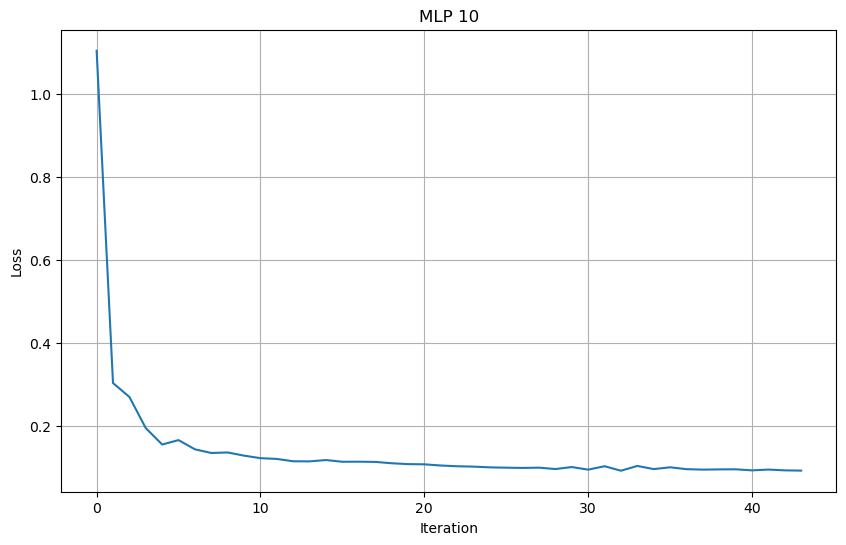

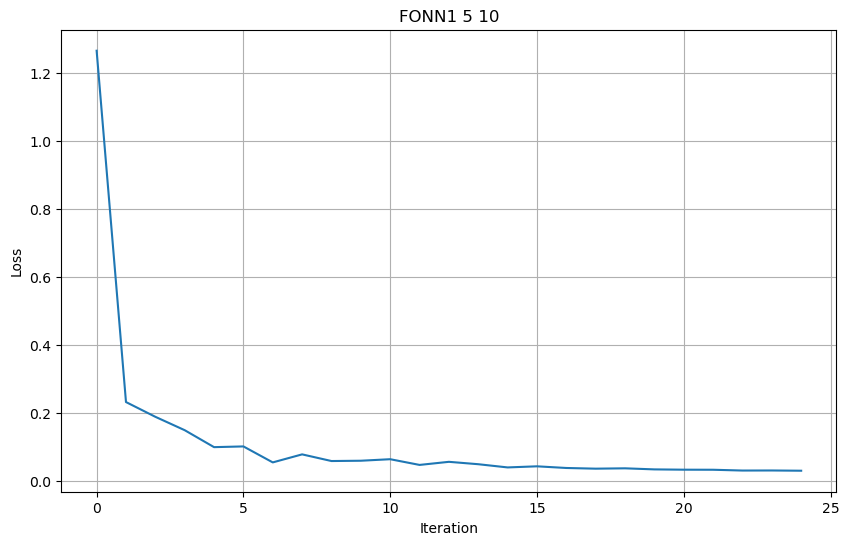

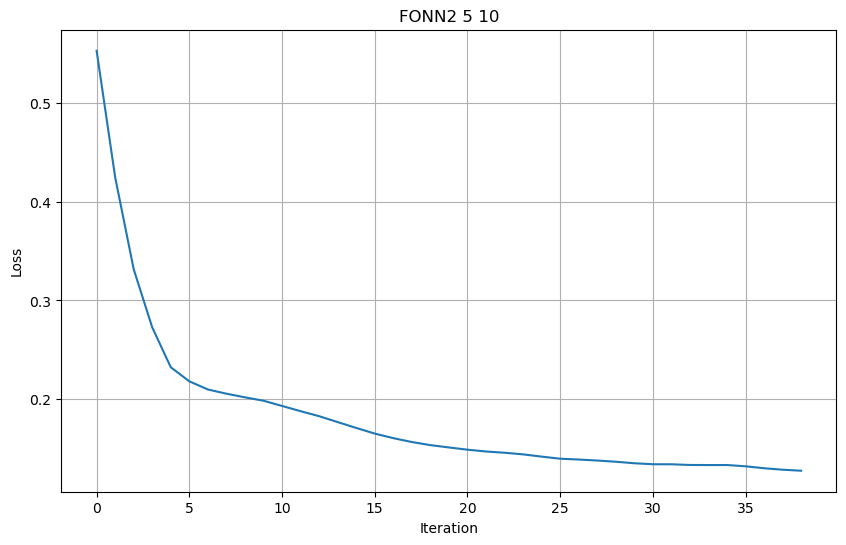

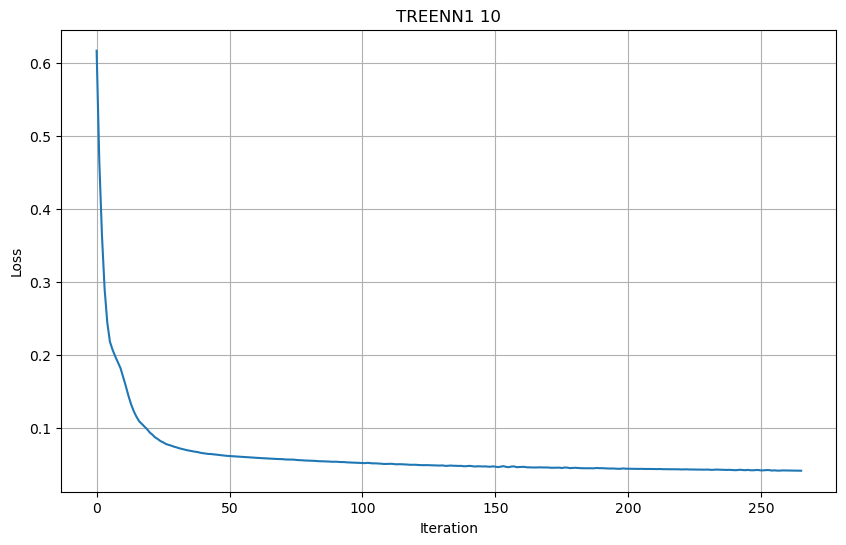

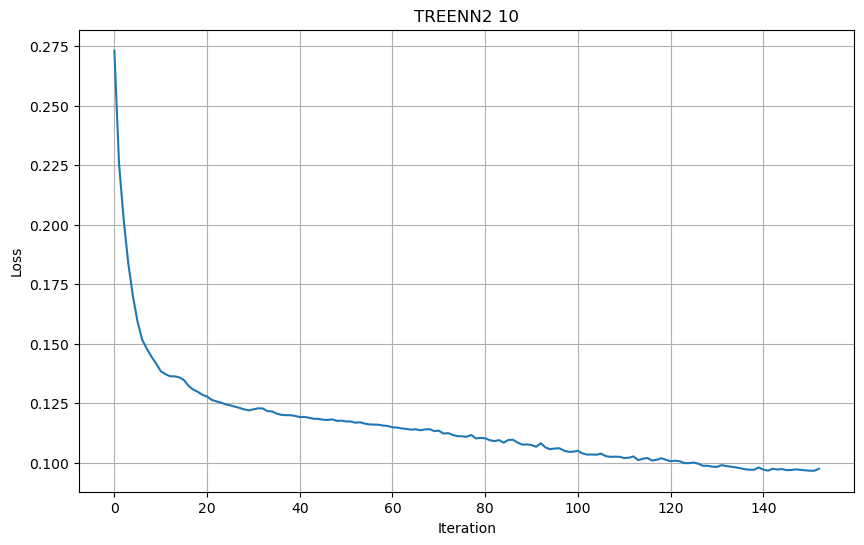

In [8]:
import matplotlib.pyplot as plt


def plot_loss(model, title='Loss Curve'):
    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(title)
    plt.grid()
    plt.show()

for model_name, model in models.items():
    if hasattr(model.best_estimator_, 'loss_curve_'):
        plot_loss(model.best_estimator_, model_name)